Very important part of machine learning is that our model should be general enough to predict correct outputs for the data that it haven't seen yet. If model has problem with that, it may be caused by overfitting or underfitting.

### Overfitting

Overfitting means that our model is over fitted to our data. Very often this happens when we have too complex model or we trained our model for too many epochs.

When we have much better result on testset than on validation set, we can be almost completely sure that we have overfitting.

for simplisity let's consider one variable machine learning model

Let's have some points for regression

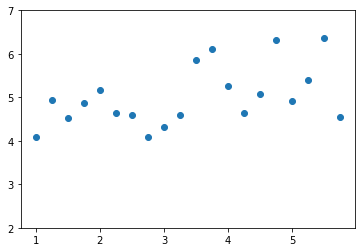

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(7)   # ყველა გაშვებაზე იგივე შედეგი რომ მოგვცეს

x = np.arange(1, 6, 0.25)   # x ღერძზე თანაბრად დაშორებული წერტილები ავიღოთ
# y ღერძზე ავიღოთ შემთხვევითი რიცხვები და მივცეთ მცირედი ზრდის ტენდენცია
y1 = np.random.rand(10)*1.2 + 4
y2 = np.random.rand(10)*2 + 4.5  
y = np.concatenate([y1, y2])

plt.scatter(x, y) 
plt.yticks(range(2, 8))
plt.show()

We can fit a line or some more complex function to this points. Our error will be less if we use higher order polynom. 

We can use `polyfit()` method from numpy library for fitting different order polynomials to points using least squares method, we'll pass `x`, `y` and the order of polynom and this function returns the polynom. This method evaluares result by mathematical way and not AI.

In [3]:
z = np.polyfit(x, y, 1)  # line
z

array([0.22877966, 4.24535348])

In [4]:
p = np.poly1d(z) 
p(10)   

6.533150043365388

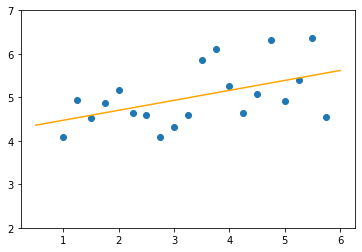

In [5]:
t = np.linspace(0.5, 6, 2)    
plt.scatter(x, y)
plt.plot(t, p(t), c='orange')
plt.yticks(range(2, 8))
plt.show()

let's try some higher order polynomials

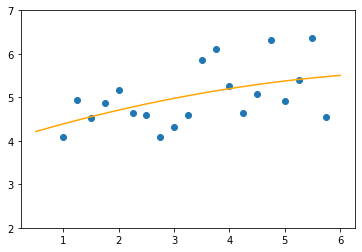

In [6]:
p = np.poly1d(np.polyfit(x, y, 2))

t = np.linspace(0.5, 6, 300)
plt.scatter(x, y)
plt.plot(t, p(t), c='orange')
plt.yticks(range(2, 8))
plt.show()

quadratic function fits better

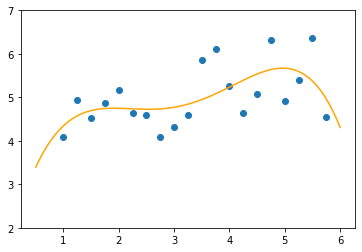

In [7]:
p = np.poly1d(np.polyfit(x, y, 4))

t = np.linspace(0.5, 6, 300)  
plt.scatter(x, y)
plt.plot(t, p(t), c='orange')
plt.yticks(range(2, 8))
plt.show()

Fourth order polynomial is even better

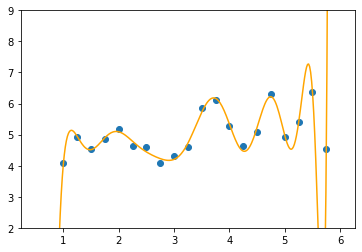

In [8]:
p = np.poly1d(np.polyfit(x, y, 15))

t = np.linspace(0.5, 6, 300)  
plt.scatter(x, y)
plt.plot(t, p(t), c='orange')
plt.ylim(2, 9)   
plt.yticks(range(2, 10))
plt.show()

15th order polynomial touches almost all points and we should know that this model can't be generalized well and it can't predict well for new points. This is overfitting.

There are several ways to fix Overfitting:  
* more training data
* Delete less meaningful features
* early stopping - Loss function decreases over epochs but when model starts overfitting, loss function decreases for training set and increases for validation set, if we stop in this moment than we'll get rid of overfitting  
![](http://fouryears.eu/wp-content/uploads/2017/12/early_stopping.png)   
* Regularization - This is the way to make complex models simplier 
* Joining some models - We can train several models with the same data and combine them

### Regularization

Sometimes higher order polynoms cause overfitting and we want to reduce its order somehow, that's what regularization does. Let's consider 5th order polynom: 
$$w_0 + w_1 x + w_2 x^2 + w_3 x^3 + w_4 x^4 + w_5 x^5$$  
Our cost function was liek this:
$$ J(w) = \frac{1}{2n} \sum_{i=1}^{n}(y_i^{\ast} - y_i)^2 $$
Let's change it:
$$ J(w) = \frac{1}{2n} \sum_{i=1}^{n}(y_i^{\ast} - y_i)^2 + 10^5w_4^2 + 10^5w_5^2 $$
Now our goal is to minimize mean squared error and $ 10^5w_4^2 + 10^5w_5^2 $ too, this means $w_4$ and $w_5$ should be near to zero so we'll get almost cubic function instead of fifth order polynom.


We don't know which features will have bigger weights so we can make the same thing to all parameters. Smaller parameters gives us simplier functions and the chance of overfit reduces.New cost function will be like this:
$$ J(w) = \frac{1}{2n} \left[ \sum_{i=1}^{n}(y_i^{\ast} - y_i)^2 + \lambda\sum_{j=1}^{m}w_j^2 \right] $$  
$\lambda$ is regularization parameter. if $\lambda$ is bigger, weights goes to zero. Square is needed because we don't need negative big values, it's $L_2$ regularization and such regression is called Ridge Regression. In $L_1$ regularization we can abs value instead of squares.

We have new cost function so partial derivatives in gradient descent will be different:
$$ w_0^{j+1} = w_0^j - L\frac{1}{n}\sum_{i=1}^{n} (y_i^\ast - y_i) $$
$$ w_k^{j+1} = w_k^j - L \bigg[ \frac{1}{n}\sum_{i=1}^{n} (y_i^\ast - y_i)x_{i,k} + \frac{\lambda}{n}w_{k}^j \bigg] $$

We can solve regularized linear regression with some mathematical method:
$$(X^TX + \lambda\cdot A)^{-1}X^Ty
$$
where
$$
A = 
\begin{pmatrix}
    0 & 0 & \cdots & 0 \\
    0 & 1 & \cdots & 0 \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    0 & 0 & \cdots & 1 
\end{pmatrix}
$$  
This matrix always will be invertable

We can solve linear regression problem with this mathematical way using `Ridge` class from sklearn.linear_model. We should pass to it a regularization parameter(default value is 1)

Let's discuss random numbers in range of $[4, 6]$

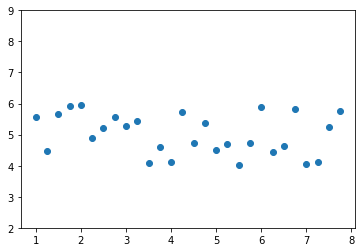

In [9]:
np.random.seed(13)   

X_train = np.arange(1, 6, 0.25).reshape(-1, 1)   
X_test = np.arange(6, 8, 0.25).reshape(-1, 1)
X = np.concatenate([X_train, X_test])

y_train = np.random.rand(20)*2 + 4
y_test = np.random.rand(8)*2 + 4
y = np.concatenate([y_train, y_test])  


plt.scatter(X, y) 
plt.ylim(2, 9)
plt.show()

Left 20 points are training set and left 8 points are test set. Let's solve this problem with linear regression

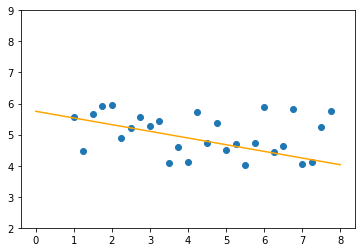

In [10]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train) 

t = np.array([[0], [8]])

plt.scatter(X, y) 
plt.plot(t, reg.predict(t), c='orange')
plt.ylim(2, 9)
plt.show()

We got inclined line but we know that our points are definitely in range $[4, 6]$. Let's try regularized linear regression with regularization parameter - 100.

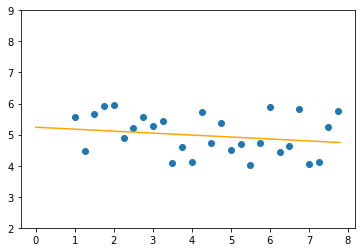

In [11]:
ridge = linear_model.Ridge(alpha=100)
ridge.fit(X_train, y_train)

t = np.array([[0], [7.8]])

plt.scatter(X, y) 
plt.plot(t, ridge.predict(t), c='orange')
plt.ylim(2, 9)
plt.show()

line is more horisontal as model is more simplier.

### Underfitting

Underfitting means when model is not fitting to points. It can be caused by several problems: small epoch number, wrong model, wrong parameters, bad preprocessed data...
 

Let's consider one variable linear regression

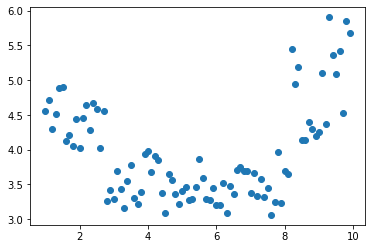

In [12]:
np.random.seed(3)

x = np.arange(1, 10, 0.1)    
y1 = np.random.rand(18) + 4  
y2 = np.random.rand(18) + 3
y3 = np.random.rand(18) + 3
y4 = np.random.rand(18) + 3
y5 = np.random.rand(18)*2 + 4
y = np.concatenate([y1, y2, y3, y4, y5])

plt.scatter(x, y) 
plt.show()

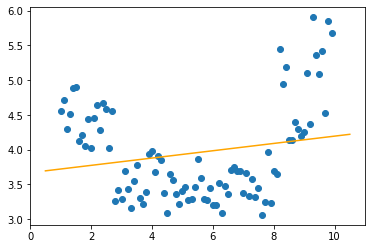

In [13]:
p = np.poly1d(np.polyfit(x, y, 1))

t = np.linspace(0.5, 10.5, 2)  
plt.scatter(x, y)
plt.plot(t, p(t), c='orange')
plt.show()

using linear regression we got underfit

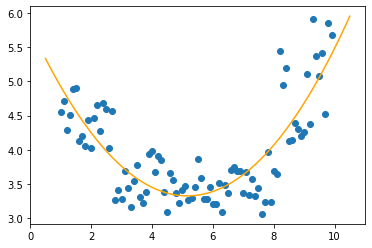

In [14]:
p = np.poly1d(np.polyfit(x, y, 2))

t = np.linspace(0.5, 10.5, 500)  
plt.scatter(x, y)
plt.plot(t, p(t), c='orange')
plt.show()

Second order polynom fits pretty well

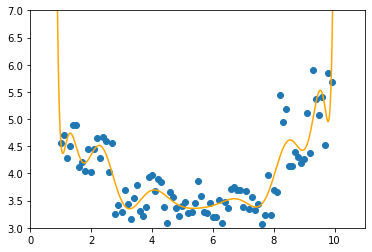

In [15]:
p = np.poly1d(np.polyfit(x, y, 16))

t = np.linspace(0.5, 10.5, 500)  
plt.scatter(x, y)
plt.plot(t, p(t), c='orange')
plt.ylim(3, 7)
plt.show()

16th order polynom gives us overfit of course

Ways to solve underfitting:  
* Change model parameters
* Try more complex model
* Try more epochs
* Try without regularization



### Bias-Variance Tradeoff

Overfitting = high variance. This means that model fits to points that are very far from average points.
underfitting = high bias.

Bias-Variance Tradeoff is fundamental problem of supervised learning. Its goal is to find some balance between variance and bias. 